# Breast Cancer Wisconsin (Diagnostic)

In [1]:
#imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score

# Análise Exploratoria

In [2]:
df = pd.read_csv('breast_cancer.csv')


print("Dimensões do dataset:", df.shape)
print("\nPrimeiras linhas:")
print(df.head())
print("\nInformações sobre tipos de dados e valores nulos:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

# Verificar distribuição da variável target
print("\nDistribuição da variável target:")
print(df['target'].value_counts())
print("(0 = maligno, 1 = benigno)")

Dimensões do dataset: (569, 8)

Primeiras linhas:
   Unnamed: 0  mean_concave_points  mean_perimeter  mean_fractal_dimension  \
0           0              0.14710          122.80                 0.07871   
1           1              0.07017          132.90                 0.05667   
2           2              0.12790          130.00                 0.05999   
3           3              0.10520           77.58                 0.09744   
4           4              0.10430          135.10                 0.05883   

   worst_perimeter  worst_texture  worst_area  target  
0           184.60          17.33      2019.0       0  
1           158.80          23.41      1956.0       0  
2           152.50          25.53      1709.0       0  
3            98.87          26.50       567.7       0  
4           152.20          16.67      1575.0       0  

Informações sobre tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 

## Boxplot

Comparação entre as distribuições das variáveies mean_concave_points, mean_perimeter, mean_fractal_dimension, worst_perimeter, worst_texture, worst_area entre tumores malignos e benignos.

## Interpretação dos bloxplots:
* Bloxpot do mean_concave_points mostra que tumores malignos possuem valores mais altos comparados aos benignos, dando o indicativo de que tumores malignos têm contornos mais irregulares com mais porções côncavas. 
* As variavéis mean_perimeter e worst_perimeter aparentam representar o crescimento de tumores malignos em relaçaõ ao benigos, isto é, um perímetro maior.

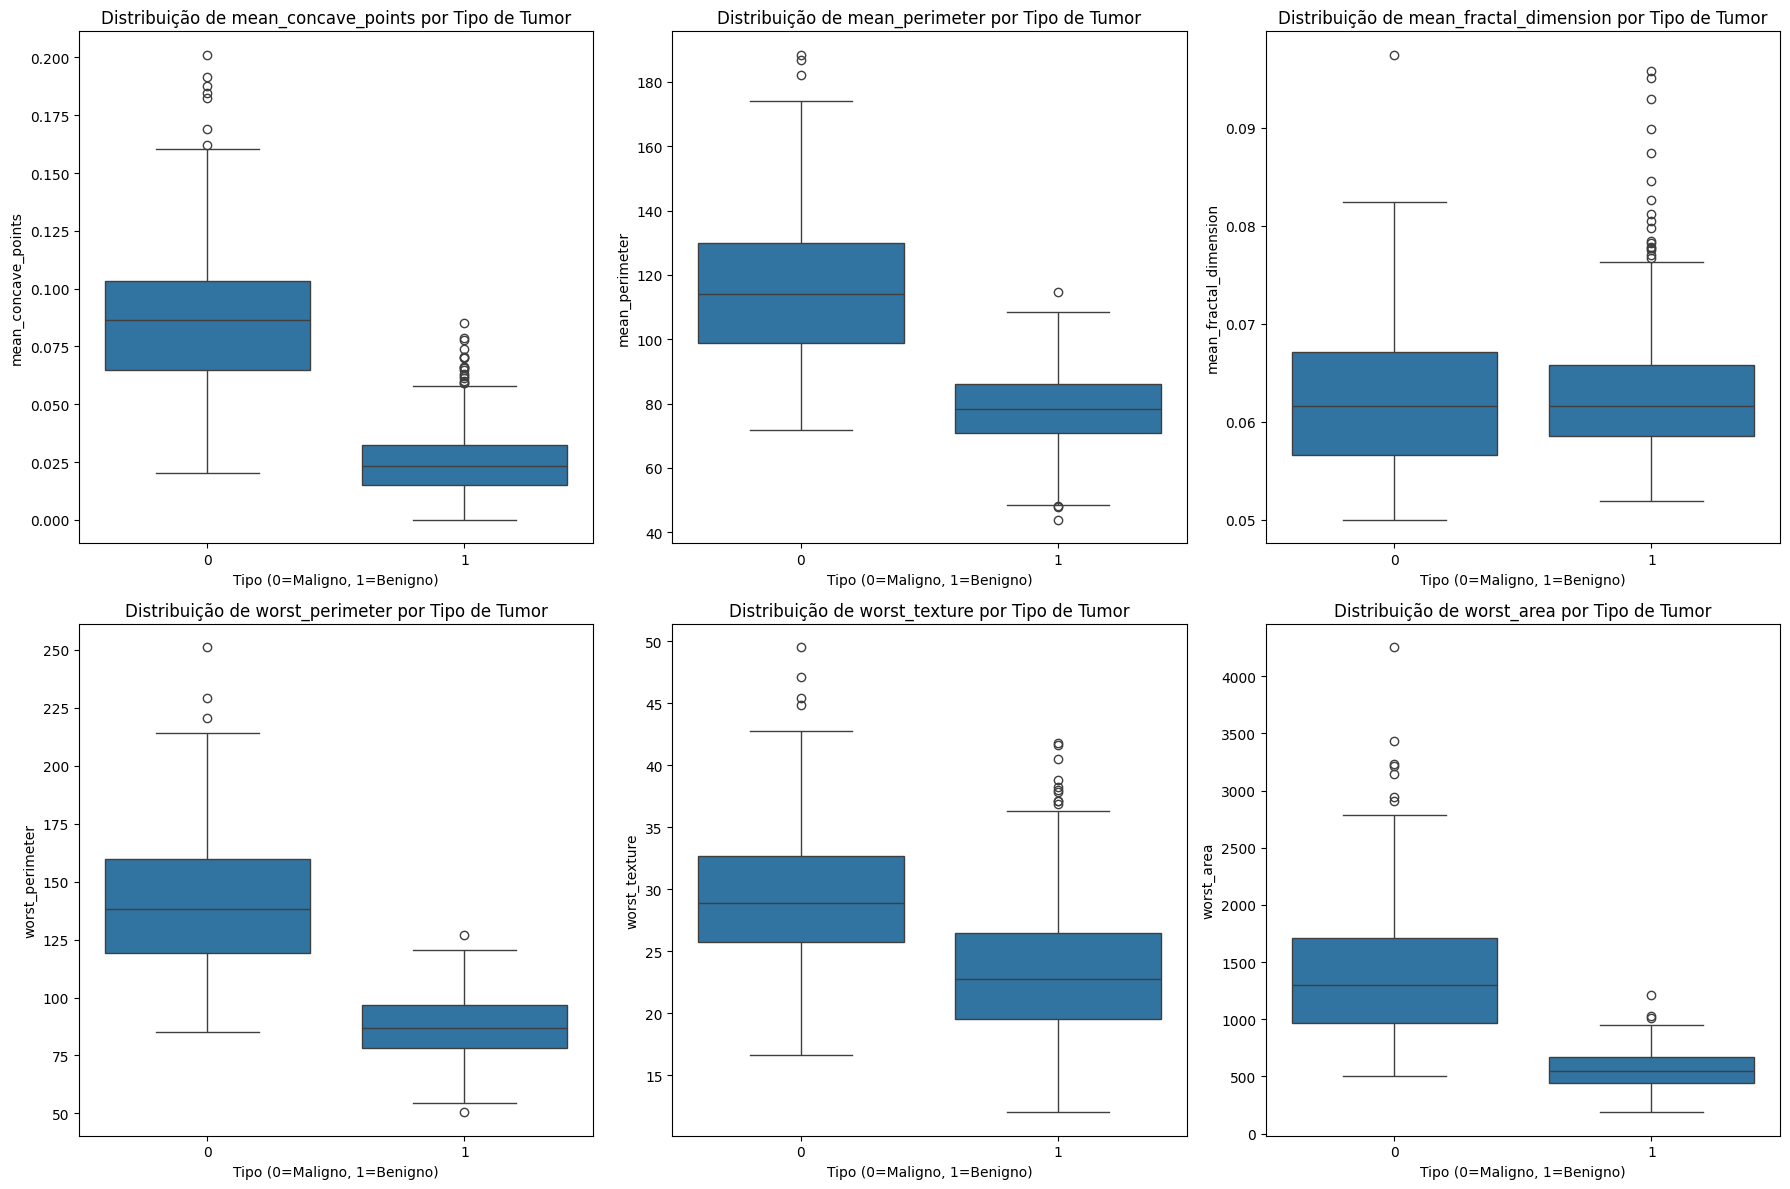

In [3]:
features = ['mean_concave_points', 'mean_perimeter', 'mean_fractal_dimension', 
           'worst_perimeter', 'worst_texture', 'worst_area']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(features):
    sns.boxplot(data=df, x='target', y=var, ax=axes[i])
    axes[i].set_title(f'Distribuição de {var} por Tipo de Tumor')
    axes[i].set_xlabel('Tipo (0=Maligno, 1=Benigno)')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

## Matriz de Correlação

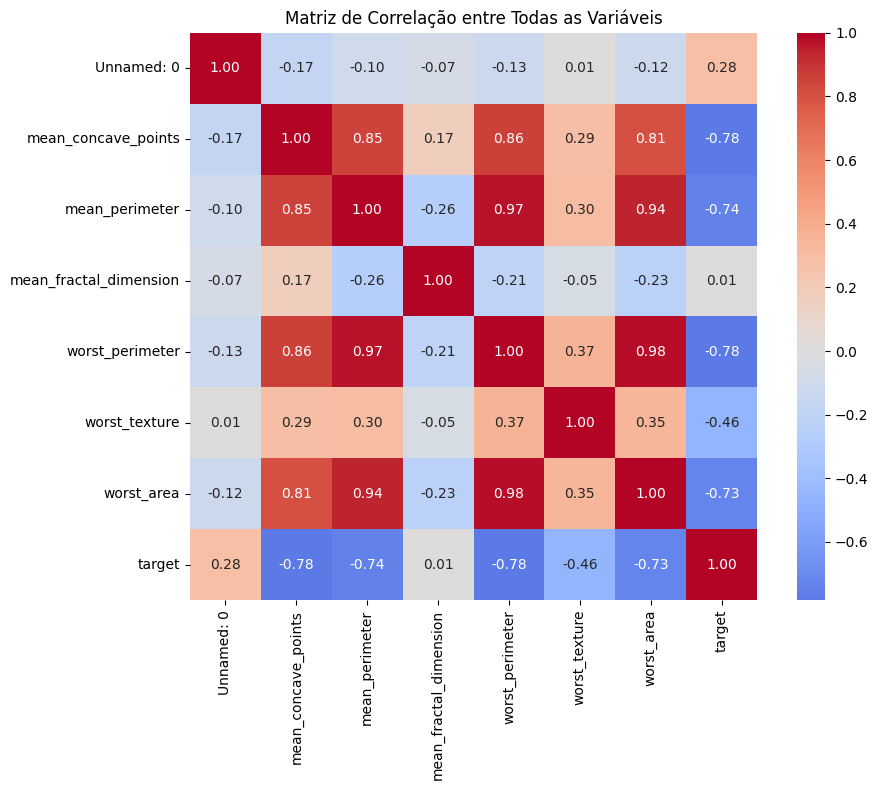

In [4]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Matriz de Correlação entre Todas as Variáveis')
plt.tight_layout()
plt.show()


## Pairplot

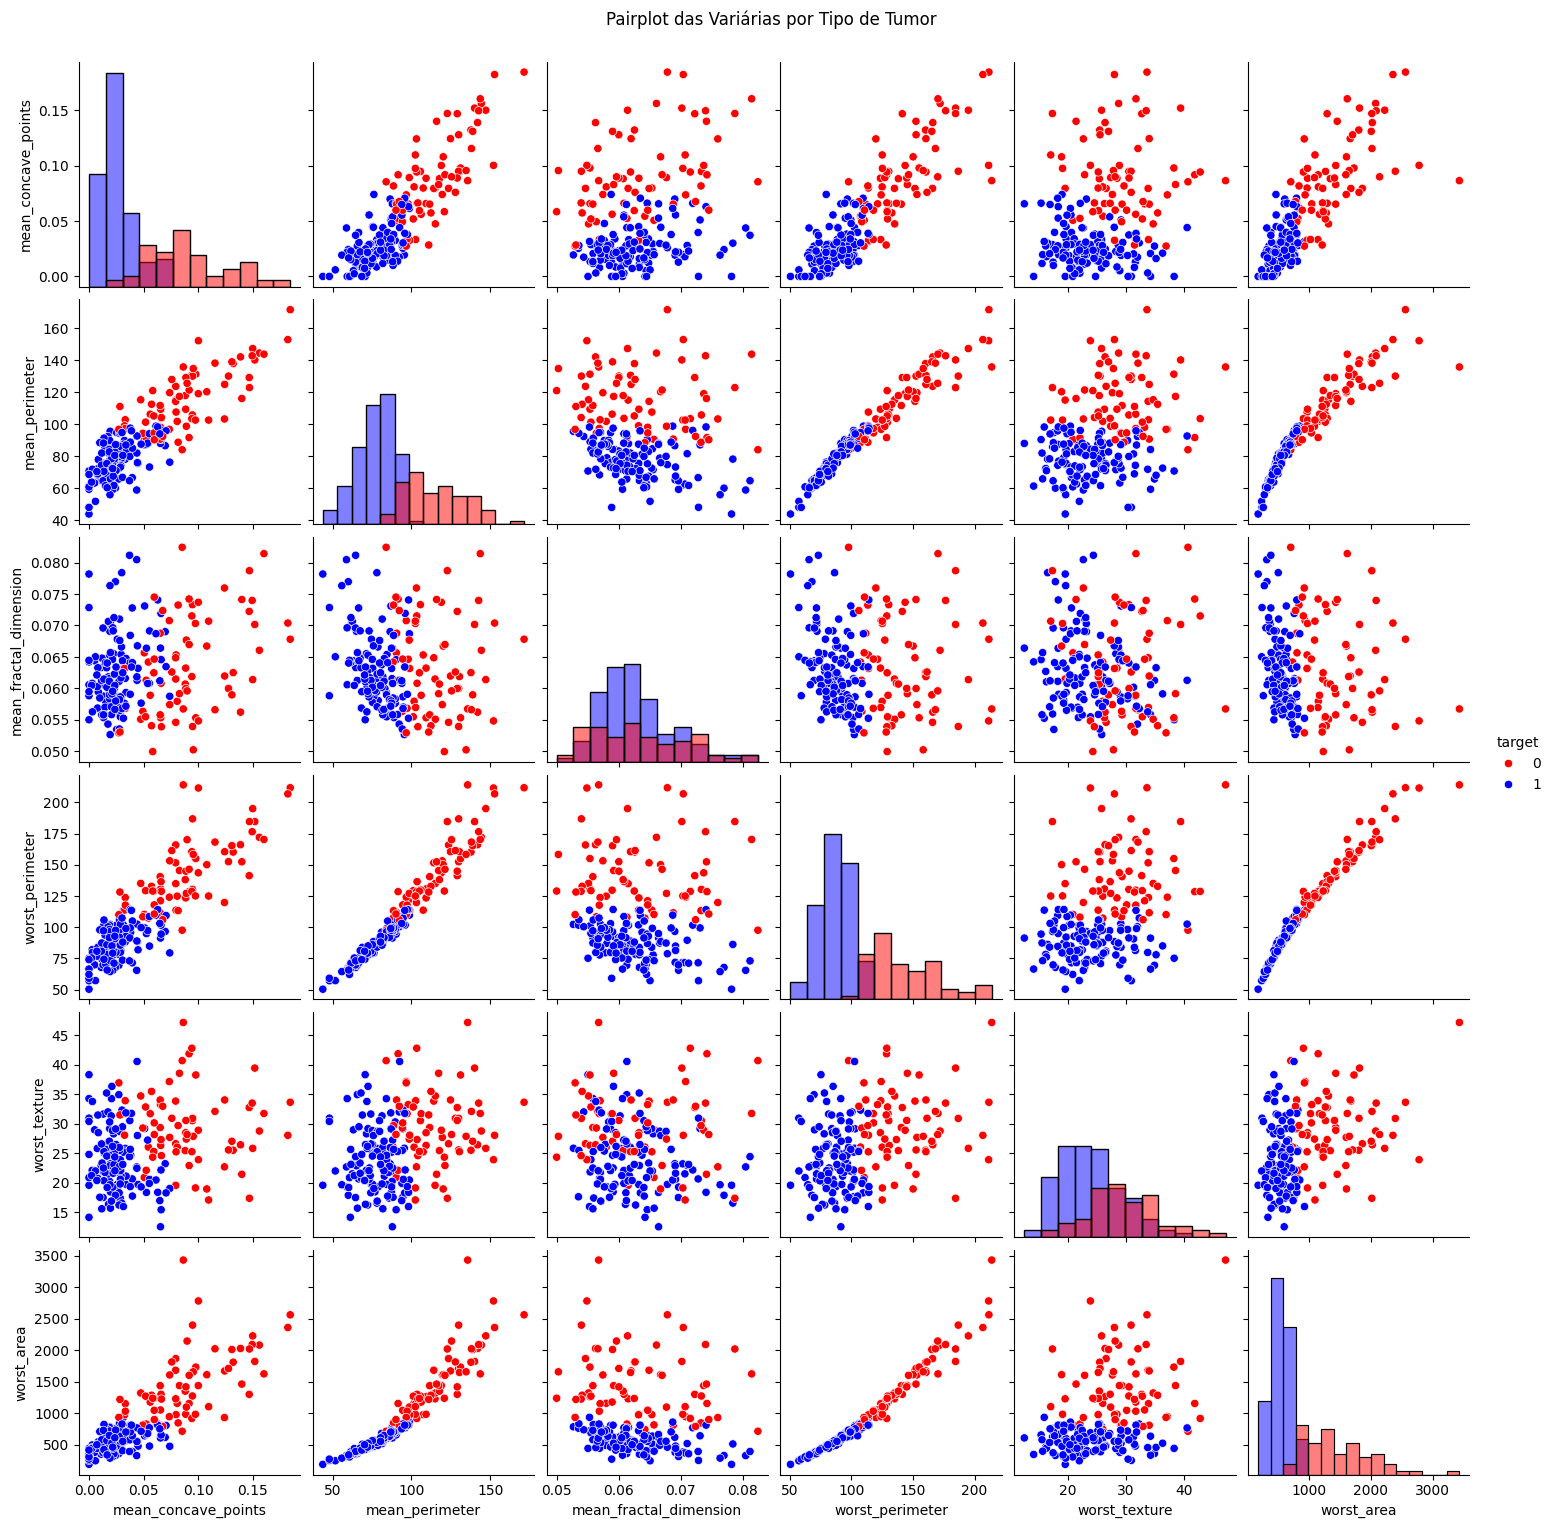

In [5]:
sample_df = df.sample(n=200, random_state=42)  
sns.pairplot(sample_df, hue='target', vars=features, palette={0: 'red', 1: 'blue'}, diag_kind='hist')
plt.suptitle('Pairplot das Variárias por Tipo de Tumor', y=1.02)
plt.show()

In [6]:
malignant = df[df['target'] == 0]
benign = df[df['target'] == 1]

print(f"\nTotal de casos: {len(df)}")
print(f"Malignos: {len(malignant)} | Benignos: {len(benign)}")


Total de casos: 569
Malignos: 212 | Benignos: 357


# Regressão Linear

Considerando a etapa de análise exploratório dos dados para treinamento do modelo optou-se em utilizar apenas as features mean_concave_points, worst_texture, mean_fractal_dimension. A decisão foi tomada devido a multicolinearidade entre as variavies mean_perimeter, worst_perimeter e worst_area, como é possivel observar na matrix de correlação.

In [7]:
x = df[['mean_concave_points', 'worst_texture', 'mean_fractal_dimension']] 
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,       
    random_state=42,     
    stratify=y      
)

In [8]:
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

regression_lienar = sm.regression.linear_model.OLS(y_train, x_train_const).fit()
print(regression_lienar.summary())

y_pred_prob = regression_lienar.predict(x_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     326.5
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          1.25e-112
Time:                        15:05:41   Log-Likelihood:                -52.600
No. Observations:                 455   AIC:                             113.2
Df Residuals:                     451   BIC:                             129.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

## Métricas

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred_prob)

print(f"\nMétricas de Avaliação:")
print(f"Acurácia: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Métricas de Avaliação:
Acurácia: 0.9561
F1-Score: 0.9655
Recall: 0.9722
MSE: 0.0850
R²: 0.6347


* Variavés preditoras: mean_concave_points, worst_texture, mean_fractal_dimension.

* P-valor e significância marginal: Como citado anteriormente, devido o grau de multicolinearidade entre as variavies mean_perimeter, worst_perimeter e worst_area, essas features foram desconsideradas para treinamento do modelo, pois usá-las tornaria o modelo impreciso. Como consequência desse "tratamento" antes do treinamento, p-valores de coeficientes individuais iguais a 0, significando que todas são altamente significativas.

# Regressão Logistica

In [10]:
regression_log = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()

print(regression_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  455
Model:                            GLM   Df Residuals:                      452
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59.326
Date:                Mon, 24 Nov 2025   Deviance:                       118.65
Time:                        15:05:41   Pearson chi2:                     181.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6539
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
mean_concave_points     -163

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred_prob)

print(f"\nMétricas de Avaliação:")
print(f"Acurácia: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Métricas de Avaliação:
Acurácia: 0.9561
F1-Score: 0.9655
Recall: 0.9722
MSE: 0.0850
R²: 0.6347


* Variavés preditoras: mean_concave_points, worst_texture, mean_fractal_dimension.

*  Todas as variáveis são estatisticamente significativas.